# `DSML Workshop 06` - Working with Time Series Data

In this workshop we focus on working with time series data, a very common data science task. We have covered some of this stuff implictly in the previous workshop. Today we intend to go into detail on the time series capabilities of Python. We will introduce DateTime and as the undelying time series implementation but focus mostly on Pandas.

After covering the basics of time series in Python we will work hands-on with an electricity price dataset. At the end of this session you should:

- Understand the Python `DateTime` Module and its implementation in `Pandas`
- Read-in, manipulate, index and group time series data
- Extract common time series features such as day-of-week, hour-of-day and weekday/weekend

In [2]:
from datetime import date, time, datetime, timedelta 

## `DateTime`

Time series work very differently from standard numbers series such as integer series. You need special rules to perform operations on them. For this Python provides the necessary tools such as the built-in libraries `datetime` and`dateutil` or NumPy's `datetime64`. You can read up on these here: https://docs.python.org/3/library/datetime.html

- `datetime.date`: An idealized naive date, assuming the current Gregorian calendar always was, and always will be, in effect. Attributes: year, month, and day.

- `datetime.time`: An idealized time, independent of any particular day, assuming that every day has exactly 24*60*60 seconds (there is no notion of “leap seconds” here). Attributes: hour, minute, second, microsecond, and tzinfo.

- `datetime.datetime`: A combination of a date and a time. Attributes: year, month, day, hour, minute, second, microsecond, and tzinfo.

- `datetime.timedelta`: A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.

- `datetime.tzinfo`: An abstract base class for time zone information objects. These are used by the datetime and time classes to provide a customizable notion of time adjustment (for example, to account for time zone and/or daylight saving time).

- `datetime.timezone`: A class that implements the tzinfo abstract base class as a fixed offset from the UTC.

In [16]:
# Let's define a datetime object

date1 = datetime(year=2020, month=5, day=13, hour=12, minute= 29, second=59, microsecond=109262)
date= date(year=2020, month=5, day=13)

In [9]:
type(date2)

datetime.date

In [11]:
date2

datetime.date(2020, 5, 13)

In [12]:
# And a second one
date2 = datetime(year=2020, month=5, day=14, hour=16, minute= 1, second=59, microsecond=109262)

In [13]:
type(date2)

datetime.datetime

You can perform oparations on these tow datetime objects: A timedelta object results

In [14]:
# You can perform oparations on these two datetime objects: A timedelta aobject°results
delta = date2 - date1

In [15]:
delta

datetime.timedelta(days=1, seconds=12720)

In [17]:
type(delta)

datetime.timedelta

A powerful extension of `DateTime` is the `dateutil` module which allows you to parse date and time information that comes in different formats

In [20]:
from dateutil import parser
date3 = parser.parse("13th of May, 2020")
date4 = parser.parse("13/05/2020")

import pandas as pd
date5 = pd.to_datetime("13th of May, 2020") #pandas to_datetime() function is a v. powerful parser!

print(date3)
print(date4)
print(date5)

2020-05-13 00:00:00
2020-05-13 00:00:00
2020-05-13 00:00:00


The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. They have their weaknesses when you whish wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

## Vectorized Time Series Data in `NumPy`

In [21]:
import numpy as np

In [22]:
date5 = np.array('2019-05-07', dtype=np.datetime64)
date5

array('2019-05-07', dtype='datetime64[D]')

Once we have the date object in a Numpy format, we can perform vectorized opeartions on it:

In [23]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
date5-np.arange(12)

array(['2019-05-07', '2019-05-06', '2019-05-05', '2019-05-04',
       '2019-05-03', '2019-05-02', '2019-05-01', '2019-04-30',
       '2019-04-29', '2019-04-28', '2019-04-27', '2019-04-26'],
      dtype='datetime64[D]')

## `Pandas` for Time Series

In this workshop we will focus on the datetime functionality provided by Pandas. Pandas builds upon all the tools above to provide a `Timestamp` object, which combines the ease-of-use of datetime with the efficient storage and vectorized interface of `numpy.datetime64`. From a group of these Timestamp objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a Series or DataFrame; we'll see how this works below.

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few forms, which we will discuss here:
* __Time stamps__ reference particular moments in time (e.g., May 7th, 2019 at 4:00pm).
* __Time intervals__ and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
* __Time deltas__ or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

In the following we will introduce how to work with each of these types of date/time data in Python/Pandas. This short section is by no means a complete guide to the time series tools available in Python or Pandas, but will equip you with the relevat methods and techniques necessary to complete your team assignments. 

We will keep theory very short and focus instead on key methods relevant to your assignment by using the real-world example of German power prices. For more information on this please consult the relevant Pandas documentation [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

In [25]:
import pandas as pd

In [28]:
### Let's define a date and return the respective time stamp

date6 = pd.to_datetime("7th of May, 2019")
date7 = pd.to_datetime("07.05.2019",format="%d.%m.%Y") #the format argument defines the format in which the data comes in
print(date6)
print(date7)

2019-05-07 00:00:00
2019-05-07 00:00:00


In [29]:
type(date6)

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
# we can also return important relevant time features 
date6.weekday() # The day of the week with Monday=0, Sunday=6

1

In [31]:
date6.year

2019

In [32]:
date6.hour

0

Additionally, we can do NumPy-style vectorized operations directly on this same object. This will return the DatetimeIndex object from which we can index Timestamps

In [37]:
#np.arange(8)

In [34]:
date_index1 = date6 + pd.to_timedelta(np.arange(8), 'D') # 'D' specifies the frequency, i.e. days
date_index1

DatetimeIndex(['2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-11', '2019-05-12', '2019-05-13', '2019-05-14'],
              dtype='datetime64[ns]', freq=None)

In [35]:
date_index2 = date6 + pd.to_timedelta(np.arange(8), 'H') # 'H' specifies the frequency, i.e. hours
date_index2

DatetimeIndex(['2019-05-07 00:00:00', '2019-05-07 01:00:00',
               '2019-05-07 02:00:00', '2019-05-07 03:00:00',
               '2019-05-07 04:00:00', '2019-05-07 05:00:00',
               '2019-05-07 06:00:00', '2019-05-07 07:00:00'],
              dtype='datetime64[ns]', freq=None)

### `Pandas` Intervals/Periods
For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex

In [25]:
date_index3 = pd.date_range(datetime(year=2019, month=5, day=7), periods=8,freq="2H")
date_index3

DatetimeIndex(['2019-05-07 00:00:00', '2019-05-07 02:00:00',
               '2019-05-07 04:00:00', '2019-05-07 06:00:00',
               '2019-05-07 08:00:00', '2019-05-07 10:00:00',
               '2019-05-07 12:00:00', '2019-05-07 14:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [44]:
# We can adjust the frequency which defaults to D (i.e. days)
date_index3 = pd.date_range(start=datetime(year=2019, month=1, day=1), end=datetime(year=2020, month=1, day=1), freq="H")
#print(365*24)
print(date_index3)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-31 15:00:00', '2019-12-31 16:00:00',
               '2019-12-31 17:00:00', '2019-12-31 18:00:00',
               '2019-12-31 19:00:00', '2019-12-31 20:00:00',
               '2019-12-31 21:00:00', '2019-12-31 22:00:00',
               '2019-12-31 23:00:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')


### `Pandas` Timedelta
For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

Let us define another date and determine the time delta from the orginal date through simple substraction. The result is a Timedelta object.

In [45]:
date7 = pd.to_datetime(datetime(year=2019, month=5, day=14))
date7

Timestamp('2019-05-14 00:00:00')

In [46]:
time_delta = date7-date6
time_delta

Timedelta('7 days 00:00:00')

## Real-world Example - Power Price Data
A common example in the domain of sustainability is power price analyis. We will go through a simple example using daily power price data over the past 10 years. Please download the respective file entitled `EEX_baseload_future.xlsx` from GitLab if you wish to work along with us. We will use the `Pandas` library to work with this data. We will do three things:

- Indexing of time series data
- Aggregating time series data
- Handling missing data in time series
- Extracting temporal features from time series

To run the below cell you will require the `xlrd` package. Use the following command to install it via the command line: `conda install -c anaconda xlrd`

In [32]:
#conda install -c anaconda xlrd

In [47]:
Power_prices = pd.read_excel("EEX_baseload_future.xlsx")
Power_prices["Date"] = pd.to_datetime(Power_prices["Date"])
Power_prices.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low
0,2018-05-02,38.76,NaN,NaN,NaN
1,2018-04-30,39.33,NaN,NaN,NaN
2,2018-04-27,38.81,38.85,38.88,38.85
3,2018-04-26,38.75,NaN,NaN,NaN
4,2018-04-25,38.10,NaN,NaN,NaN


In [48]:
Power_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2570 non-null   datetime64[ns]
 1   Closing_Price  2570 non-null   float64       
 2   Opening_Price  2509 non-null   float64       
 3   Daily_High     2499 non-null   float64       
 4   Daily_Low      2500 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 100.5 KB


Note: For the time being we will work with `Closing_Price` for which there are no missing values

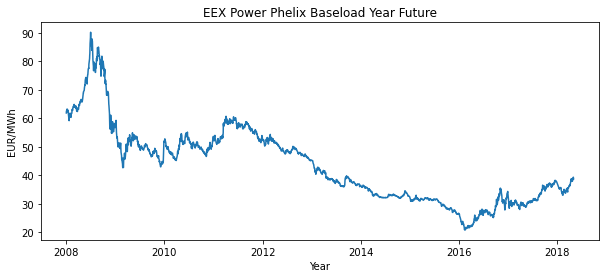

In [50]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,4))

ax.plot(Power_prices["Date"],Power_prices["Closing_Price"])
ax.set_xlabel("Year")
ax.set_ylabel("EUR/MWh")
ax.set_title("EEX Power Phelix Baseload Year Future")

plt.show()

### Indexing time series data

Let's suppose we only want to look at one specific year - say 2017. Since Pandas has a build-in datetime functionality we can perform boolean operations on the dates, which allows us to specify the desired interval through masking. In the following we create a new DataFrame for 2017. 

**Exercise 1**: Create a new DataFrame entitled `Power_prices_17` which contains only values of the year 2017. To do so, define two datetime variables to mark the upper and lower bound of the period you are interested in. Then use pandas masking techniques to index the desired period and assign it to the new DataFrame.

In [54]:
# YOUR CODE HERE

start = datetime(year=2017, month=1, day=1)
end = datetime(year=2017, month=12, day=31)

Power_prices_17 = Power_prices[(Power_prices["Date"]>=start)&(Power_prices["Date"]<=end)]

In [55]:
Power_prices_17.sort_values(by="Date",inplace=True)

/var/folders/cq/xxt4l4qn5vj86p1r_m9cqx8h0000gp/T/ipykernel_64091/127726375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Power_prices_17.sort_values(by="Date",inplace=True)


In [56]:
Power_prices_17.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low
324,2017-01-09,28.42,29.00,29.10,28.15
323,2017-01-10,29.74,28.90,30.00,28.85
322,2017-01-11,30.65,30.30,30.90,30.15
321,2017-01-12,30.41,31.00,31.05,30.20
320,2017-01-13,30.29,30.05,30.55,29.85


**Exercise 2**: Plot `Power_prices_17`

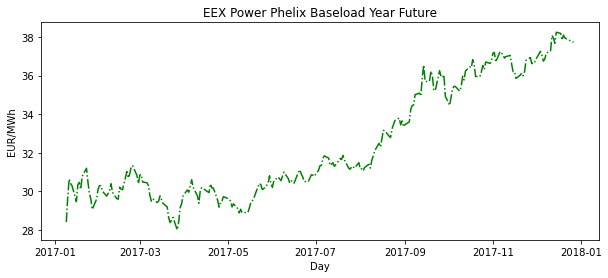

In [59]:
# YOUR CODE HERE


import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,4))

ax.plot(Power_prices_17["Date"],Power_prices_17["Closing_Price"],"-.",color="green")
ax.set_xlabel("Day")
ax.set_ylabel("EUR/MWh")
ax.set_title("EEX Power Phelix Baseload Year Future")

plt.show()



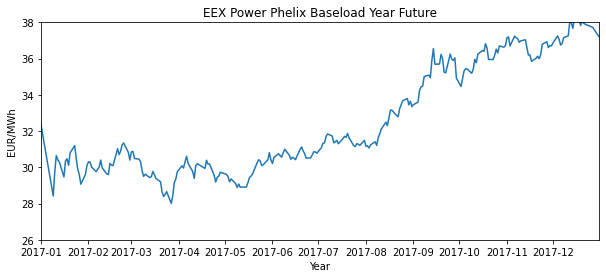

In [61]:
# Alternative: Just limt the x-axis to upper and lower limit

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,4))

ax.plot(Power_prices["Date"],Power_prices["Closing_Price"])
ax.set_xlabel("Year")
ax.set_ylabel("EUR/MWh")
ax.set_title("EEX Power Phelix Baseload Year Future")
ax.set_xlim((start,end))
ax.set_ylim((26,38))

plt.show()



### Aggregating Time Series Data

One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.
Taking a look at the Power closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of a business month (BM). The types of frequency or date offsets that can be selected are shown in the below table. By adding an S suffix, instead of the end of a period, the start is selected.

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [62]:
Power_prices.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low
0,2018-05-02,38.76,NaN,NaN,NaN
1,2018-04-30,39.33,NaN,NaN,NaN
2,2018-04-27,38.81,38.85,38.88,38.85
3,2018-04-26,38.75,NaN,NaN,NaN
4,2018-04-25,38.10,NaN,NaN,NaN


In [63]:
# for theses techniques to work we need a datetime index
Power_prices_index = Power_prices.set_index("Date")

In [68]:
Power_prices_index.head()

,Closing_Price,Opening_Price,Daily_High,Daily_Low
Date,,,,
2018-05-02,38.76,NaN,NaN,NaN
2018-04-30,39.33,NaN,NaN,NaN
2018-04-27,38.81,38.85,38.88,38.85
2018-04-26,38.75,NaN,NaN,NaN
2018-04-25,38.10,NaN,NaN,NaN


In [72]:
Power_prices_monthly_resample = Power_prices_index.resample('BM').mean()

In [73]:
Power_prices_monthly_resample

,Closing_Price,Opening_Price,Daily_High,Daily_Low
Date,,,,
2008-01-31,61.655455,61.640909,61.870455,61.361364
2008-02-29,62.757143,62.769048,62.971429,62.593810
2008-03-31,63.580000,63.657895,63.802632,63.392105
2008-04-30,65.347273,65.318182,65.479545,65.168182
2008-05-30,70.893684,70.705263,71.051053,70.515789
...,...,...,...,...
2018-01-31,35.410667,35.436000,35.536667,35.286000
2018-02-28,34.112000,34.028000,34.127895,33.930000
2018-03-30,34.960476,34.850000,34.992500,34.762500


In [74]:
# Update: For the .asfreq() command to work properly we need to sort the index first (see below)
# We use the ffill method to fill empty values 
Power_prices_monthly_freq = Power_prices_index.sort_index().asfreq(freq='BM', method="ffill")       

In [75]:
Power_prices_monthly_freq

,Closing_Price,Opening_Price,Daily_High,Daily_Low
Date,,,,
2008-01-31,61.10,61.25,61.35,61.00
2008-02-29,64.85,65.00,65.00,64.85
2008-03-31,63.58,63.45,63.60,63.45
2008-04-30,65.80,65.40,65.80,65.40
2008-05-30,72.66,72.65,72.80,71.75
...,...,...,...,...
2017-12-29,37.72,37.65,37.75,37.65
2018-01-31,34.46,34.50,34.65,34.35
2018-02-28,34.10,34.20,34.20,34.05


Notice the difference: at each point, resample reports the average of the previous month (BM), while asfreq reports the value at the end of each month.

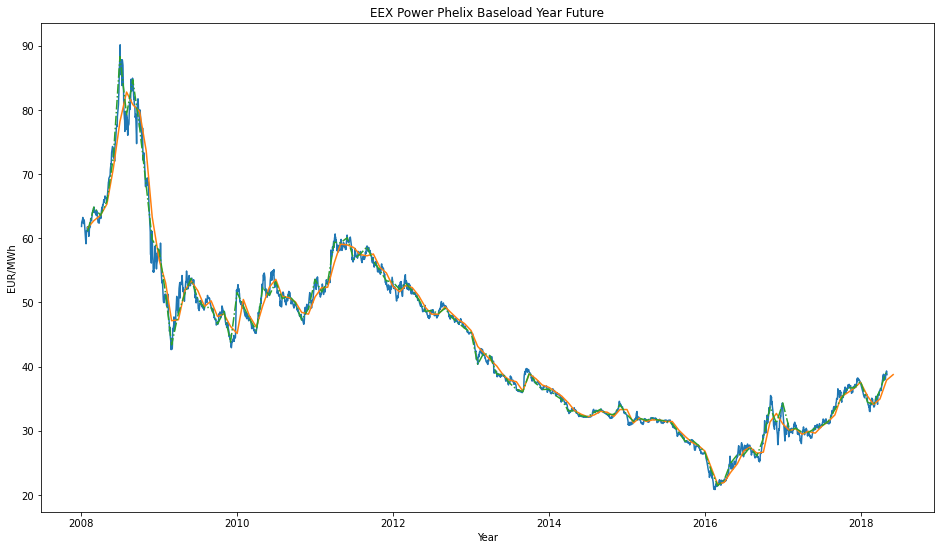

In [76]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(Power_prices_index["Closing_Price"]) #daily
ax.plot(Power_prices_monthly_resample["Closing_Price"]) #monthly resampling
ax.plot(Power_prices_monthly_freq["Closing_Price"], "-.") #monthly freq approach
ax.set_xlabel("Year")
ax.set_ylabel("EUR/MWh")
ax.set_title("EEX Power Phelix Baseload Year Future")

plt.show()

**Exercise**: Resample for a business year and plot the results for `Closing_Price`. What do you get?

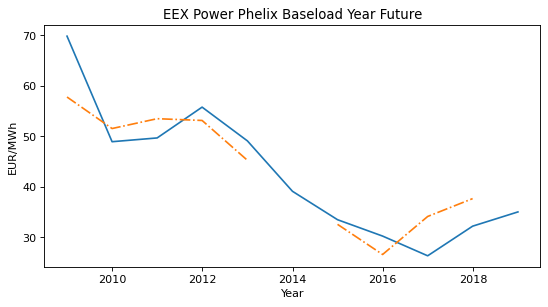

In [44]:
# YOUR CODE HERE

#EX3
# create data frame

Power_prices_yearly_resample= Power_prices_index.resample('BA').mean()
Power_prices_yearly_freq = Power_prices_index.sort_index().asfreq(freq='BA', method="ffill")


# plot
fig,ax = plt.subplots(figsize=(8,4), dpi= 80)

ax.plot(Power_prices_yearly_resample["Daily_Low"])
ax.plot(Power_prices_yearly_freq["Daily_Low"], "-.")
ax.set_xlabel("Year")
ax.set_ylabel("EUR/MWh")
ax.set_title("EEX Power Phelix Baseload Year Future")

plt.show()

### Missing Data in Time Series

Various methods exist for time series imputation. Below is an overview

**Non-time-series specific method**
- mean imputation
- median imputation
- mode imputation
- ...

**Time-series specific method**
- Last observation carried forward (LOCF)
- Next observation carried backward (NOCB)
- Linear interpolation
- Spline interpolation

For reasons of time we will look here at mean and median imputation as well as LOCF (`ffill()`) and NOCB (`bfill()`).


In [77]:
Power_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2570 non-null   datetime64[ns]
 1   Closing_Price  2570 non-null   float64       
 2   Opening_Price  2509 non-null   float64       
 3   Daily_High     2499 non-null   float64       
 4   Daily_Low      2500 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 100.5 KB


In [78]:
# fill mean
Power_prices["Opening_Price"].fillna(Power_prices["Opening_Price"].mean())

# fill median
Power_prices["Opening_Price"].fillna(Power_prices["Opening_Price"].median())

# forward fill (LOCF)
Power_prices["Opening_Price"].fillna(method="ffill")

# backward fill (NOCB) 
#Power_prices["Opening_Price"] = Power_prices["Opening_Price"].fillna(method="bfill")

0       38.85
1       38.85
2       38.85
3       38.25
4       38.25
        ...  
2565    63.00
2566    62.30
2567    62.30
2568    62.50
2569    61.55
Name: Opening_Price, Length: 2570, dtype: float64

**Exercise**: Create a new DataFrame entitled `Power_prices_clean` where you fill all missing values using the forward fill method.

In [82]:
# YOUR CODE HERE

Power_prices_clean = Power_prices.fillna(method="bfill")

In [83]:
Power_prices_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2570 non-null   datetime64[ns]
 1   Closing_Price  2570 non-null   float64       
 2   Opening_Price  2570 non-null   float64       
 3   Daily_High     2570 non-null   float64       
 4   Daily_Low      2570 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 100.5 KB


In [85]:
Power_prices_clean.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low
0,2018-05-02,38.76,38.85,38.88,38.85
1,2018-04-30,39.33,38.85,38.88,38.85
2,2018-04-27,38.81,38.85,38.88,38.85
3,2018-04-26,38.75,38.25,38.25,38.00
4,2018-04-25,38.10,38.25,38.25,38.00


In [86]:
Power_prices_clean.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low
0,2018-05-02,38.76,38.85,38.88,38.85
1,2018-04-30,39.33,38.85,38.88,38.85
2,2018-04-27,38.81,38.85,38.88,38.85
3,2018-04-26,38.75,38.25,38.25,38.00
4,2018-04-25,38.10,38.25,38.25,38.00


**Note**: For more sophisticated filling methods have a look at the built-in Pandas `interpolate()` function

### Temporal Feature Extraction

Suppose we wish to extract some temporal features for use in a machine learning model. This may be the case if time carries significant explenatory value for the dependent variable, as is the case in many real-world settings.

For illustrative pruposes let us stick with our price dataset. Suppose price is a function of the type of day, i.e. whether it is a Monday or a Friday. Let us extract a temporal feature set that carries this information.

In [99]:
Power_prices["Day_of_Week"] = Power_prices["Date"].apply(lambda x: x.weekday())

In [100]:
Power_prices.sort_values(by="Date", inplace=True)
Power_prices.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low,Day_of_Week,Day_1,Day_2,Day_3,Day_4
2569,2008-01-02,61.85,61.55,61.60,61.55,2,0,1,0,0
2568,2008-01-03,62.50,62.50,62.50,62.40,3,0,0,1,0
2567,2008-01-04,62.60,62.30,62.70,62.30,4,0,0,0,1
2566,2008-01-07,62.95,62.30,63.15,62.30,0,0,0,0,0
2565,2008-01-08,63.25,63.00,63.25,62.90,1,1,0,0,0


**Question**: What type of data is the `Day_of_week` feature? Ordinal, nominal, an interval or a ratio? Can it be used like this in a regression model? Why?

To get the `Day_of_week` feature into a format which is usable in regression models we use a technique which is often referred to as one-hot-encoding. In essence we use a binary encoding to identify the type of day. 

In [101]:
# Get dummies for Day_of_week feature

days = pd.get_dummies(Power_prices["Day_of_Week"],prefix="Day",drop_first=True)

In [102]:
days.head(5)

,Day_1,Day_2,Day_3,Day_4
2569,0,1,0,0
2568,0,0,1,0
2567,0,0,0,1
2566,0,0,0,0
2565,1,0,0,0


In [103]:
# and join it with the original DF

Power_prices[list(days.columns)] = days #alternatively you can also use df.join()!

In [104]:
Power_prices.head()

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low,Day_of_Week,Day_1,Day_2,Day_3,Day_4
2569,2008-01-02,61.85,61.55,61.60,61.55,2,0,1,0,0
2568,2008-01-03,62.50,62.50,62.50,62.40,3,0,0,1,0
2567,2008-01-04,62.60,62.30,62.70,62.30,4,0,0,0,1
2566,2008-01-07,62.95,62.30,63.15,62.30,0,0,0,0,0
2565,2008-01-08,63.25,63.00,63.25,62.90,1,1,0,0,0


Other typically used temporal features iclude:
- hour-of-day
- weekday y/n
- bank holiday y/n
- school holidays y/n
- lagged time features (e.g. dependent variable 24h ago)

In [105]:
# to get lagged features we can use pd.shift(), or groupby().diff()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.diff.html

#For illustrative purposes let us create a lagged feature \\
# Closing_Price_t-1, i.e., the closing price one period (i.e., 1 day ago)

#first sort (this ensures the shifting is correct)
Power_prices.sort_values(by="Date", inplace=True)

#Then shift column and assign to new variable
Power_prices["Closing_Price_t-1"]= Power_prices["Closing_Price"].shift(periods=1)

In [106]:
Power_prices

,Date,Closing_Price,Opening_Price,Daily_High,Daily_Low,Day_of_Week,Day_1,Day_2,Day_3,Day_4,Closing_Price_t-1
2569,2008-01-02,61.85,61.55,61.60,61.55,2,0,1,0,0,NaN
2568,2008-01-03,62.50,62.50,62.50,62.40,3,0,0,1,0,61.85
2567,2008-01-04,62.60,62.30,62.70,62.30,4,0,0,0,1,62.50
2566,2008-01-07,62.95,62.30,63.15,62.30,0,0,0,0,0,62.60
2565,2008-01-08,63.25,63.00,63.25,62.90,1,1,0,0,0,62.95
...,...,...,...,...,...,...,...,...,...,...,...
4,2018-04-25,38.10,NaN,NaN,NaN,2,0,1,0,0,38.08
3,2018-04-26,38.75,NaN,NaN,NaN,3,0,0,1,0,38.10
2,2018-04-27,38.81,38.85,38.88,38.85,4,0,0,0,1,38.75
1,2018-04-30,39.33,NaN,NaN,NaN,0,0,0,0,0,38.81


---